# MSE (Mean Squared Error)

#### What is the MSE?  
> The MSE is a real world cost function. 

#### How do we calculate it?
> To get the MSE we take the RSS and divide it by the numbe of data points.

#### Why use it?
Some considerations for the use of MSE: 

* The goal of linear regression is to minimise the distances between the points (datapoints) and the line (known as the RSS). 
* A good line is one the reduces/minimises the RSS (residual sum of squares). 
* To calculate the RSS we should take the difference between actual value and fitted value (datapoints and line) and sum them. * values below the line would therefore have a negative value. To mitigate we _square_ all the values and sum them.

In summary it's a indicator of the dependant variables variation that the model does not explain. The smaller the number the better the model fits the data. Large numbers are a poor fit.

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# add support for 3d plot
from mpl_toolkits.mplot3d.axes3d import Axes3D

# add support for colormaps 
from matplotlib import cm

# add additional mathematical support
# from sympy import symbols, diff
# from math import log

# add ML libs
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

## MSE - A cost function for regression problems 

#### $RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2$

The MSE has two typical notations:

#### $MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2$

#### $MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2$

Why is the MSE moe useful as a cost function than the RSS? 

* In a large dataset using the RSS would result in a $y$ and $\hat{y}$ value for each data point. 
* With RSS further or exponential data growth would lead to the sum growing accordingly. 
* Using RSS would mean performance would be extremely poor, eventually we would have an overflow error. 
* The MSE is contantly dividing by the number of samples therefor we have a better all round scalability and performance. 

In [16]:
# Make the sample data 
x = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7,1)

In [19]:
# run a linearRegressin
reg = LinearRegression()
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# finding the theta0 and theta1
print('Theta0: ', reg.intercept_[0])
print('Theta1: ', reg.coef_[0][0])

Theta0:  0.8475351486029536
Theta1:  1.2227264637835915


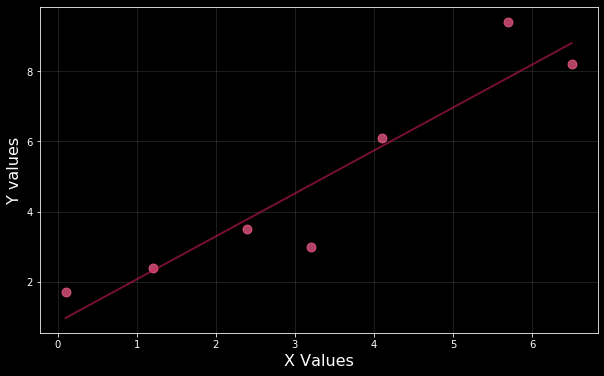

In [33]:
plt.style.use('dark_background')
plt.figure(figsize=(10,6))
plt.grid(color='w', alpha=0.15)

plt.xlabel('X Values', fontsize=16)
plt.ylabel('Y values', fontsize=16)

plt.scatter(x, y, s=80, color='#ff6090', alpha=0.7)
plt.plot(x, reg.predict(x), color='#e91e63', alpha=0.5, linewidth=2);

## Implementing the MSE cost function

###  $\hat{y} = theta0 + theta1 * x$

This means that the $\hat{y}$ = the intercept + the slope * the X value

In [37]:
yh = 0.8475351486029536 + 1.2227264637835915 * x
print('yhat values: \n', yh)
print('actual Y values: \n', y)

yhat values: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
actual Y values: 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


#### Versions of the MSE function

In [50]:
# version 1 - the specific manual calculation

# def mse(y, yh):
#     mse_calc = 1/7 * sum((y - yh)**2)          # specific and low reusage 
#     return mse_calc

In [ ]:
# version 2 - The manual calculation made generic for reuse 

# def mse(y, yh):
#     mse_calc = 1/y.size * sum((y - yh)**2)     # more generic as using the .size
#     return mse_calc

In [44]:
# version 3 - use the numpy built-in functions and use axis=0 to drive agregation by row. 
def mse(y, yh):
    mse_calc = np.average((y - yh)**2, axis=0)  # uses numpy to do the work and axis = 0 uses the rows as the driver
    return mse_calc

In [49]:
print('Manually calculated MSE: ', mse(y, yh))                              # uses verson 3 of our own cooked function 
print('sklearn MSE using calc yhat', mean_squared_error(y, yh))             # uses sklearn 
print('sklearn MSE using predict', mean_squared_error(y, reg.predict(x)))   # sklearn and model.predict 

Manually calculated MSE:  [0.94796558]
sklearn MSE using calc yhat 0.9479655759794577
sklearn MSE using predict 0.9479655759794577
